In [1]:
#CIFAR-10 데이터셋 : 10가지 사물이 담긴 컬러 이미지
# http://www.cs.toronto.edu/~kriz/cifar.html
from tensorflow.keras import datasets, utils
def make_data():
    #다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train), (X_test,y_test)=datasets.cifar10.load_data()
    #원 핫 인코딩 처리
    y_train=utils.to_categorical(y_train,10)
    y_test=utils.to_categorical(y_test,10)
    #데이터 정규화
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train /= 255
    X_test /= 255
    return (X_train,y_train), (X_test,y_test)

In [6]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Activation,Flatten, Dropout
def make_model():
    model=Sequential()
    #padding="same" 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32,(3,3),padding="same", input_shape=X_train.shape[1:],activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3),padding="same",activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    #학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt=optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model

In [7]:
a=isinstance(1, int) # True
b=isinstance(1.2, float) # True

In [8]:
def plot_loss(history, title=None):
    #history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history=history.history

    plt.plot(history["loss"])
    plt.plot(history["val_loss"])

    #타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
        
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

In [9]:
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history

    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])

    if title is not None:
        plt.title(title)
        
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

In [10]:
(X_train,y_train),(X_test,y_test)=make_data()

170498071/170498071 [==============================] - 105s 1us/step


In [11]:
X_train.shape

(50000, 32, 32, 3)

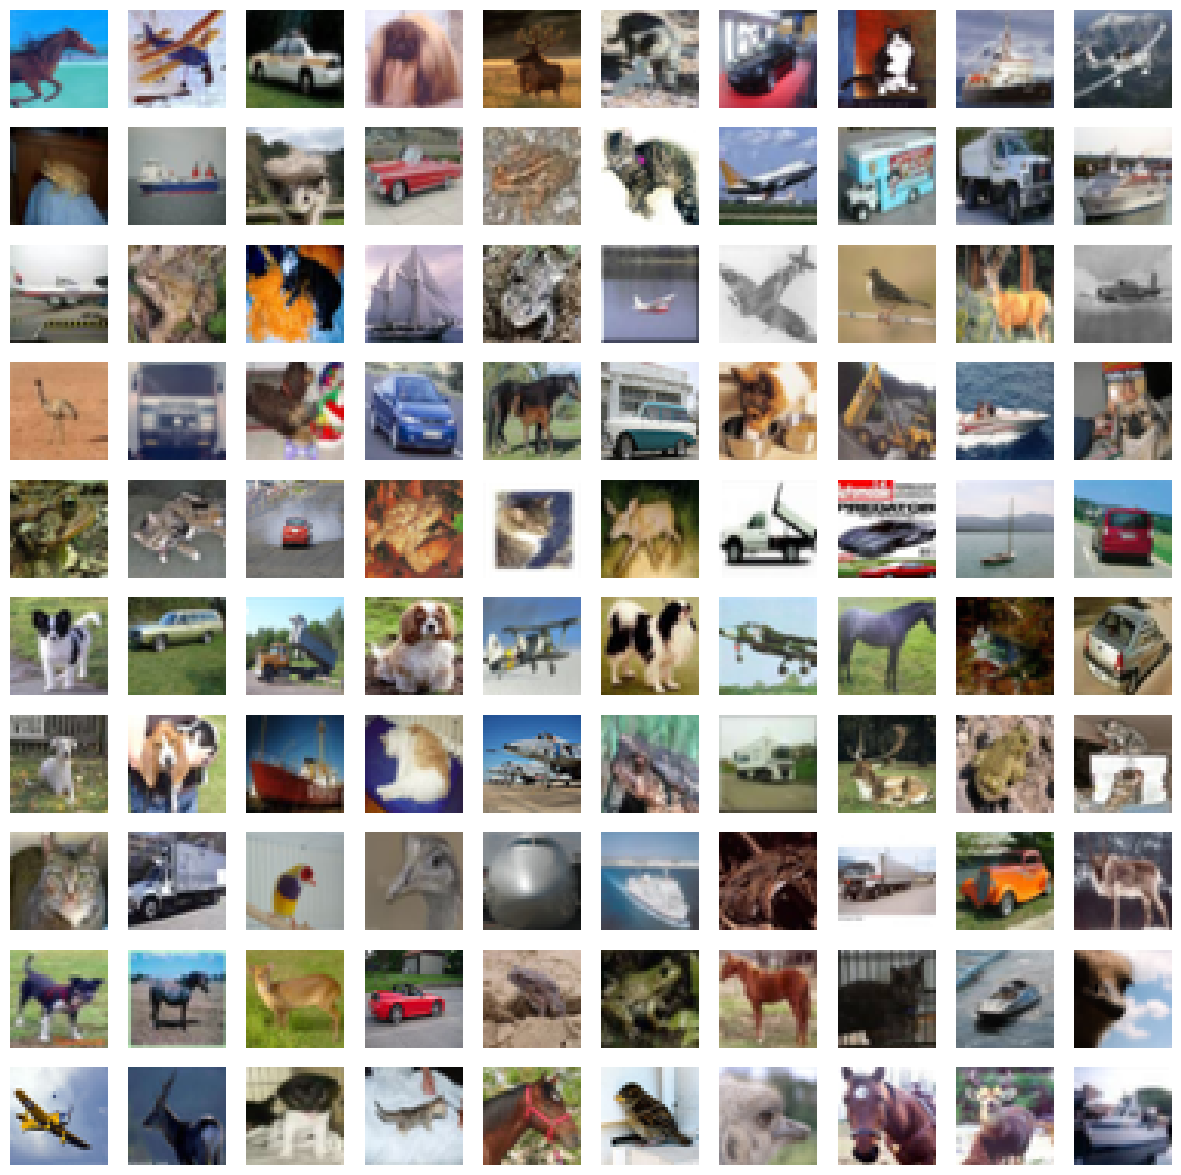

In [12]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes1=plt.subplots(10,10,figsize=(15,15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [20]:
model=make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [13]:
#모델 생성
model=make_model()

In [21]:
#학습 시간이 오래 걸림
import tensorflow as tf
with tf.device('/GPU:0'):
    history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 116s 92ms/step - loss: 1.7911 - accuracy: 0.3502 - val_loss: 1.5693 - val_accuracy: 0.4348
Epoch 2/10
1250/1250 [==============================] - 109s 87ms/step - loss: 1.4852 - accuracy: 0.4642 - val_loss: 1.3974 - val_accuracy: 0.4950
Epoch 3/10
1250/1250 [==============================] - 104s 83ms/step - loss: 1.3516 - accuracy: 0.5162 - val_loss: 1.2725 - val_accuracy: 0.5508
Epoch 4/10
1250/1250 [==============================] - 102s 82ms/step - loss: 1.2528 - accuracy: 0.5544 - val_loss: 1.1825 - val_accuracy: 0.5842
Epoch 5/10
1250/1250 [==============================] - 101s 81ms/step - loss: 1.1646 - accuracy: 0.5916 - val_loss: 1.1037 - val_accuracy: 0.6165
Epoch 6/10
1250/1250 [==============================] - 101s 81ms/step - loss: 1.0891 - accuracy: 0.6163 - val_loss: 1.0645 - val_accuracy: 0.6251
Epoch 7/10
1250/1250 [==============================] - 102s 82ms/step - loss: 1.0245 - accuracy: 0.6402 - val_loss: 0

In [22]:
#성능 평가
performance_test=model.evaluate(X_test,y_test,batch_size=128)
print(performance_test)

79/79 [==============================] - 2s 30ms/step - loss: 0.8894 - accuracy: 0.6942
[0.8894007802009583, 0.6941999793052673]


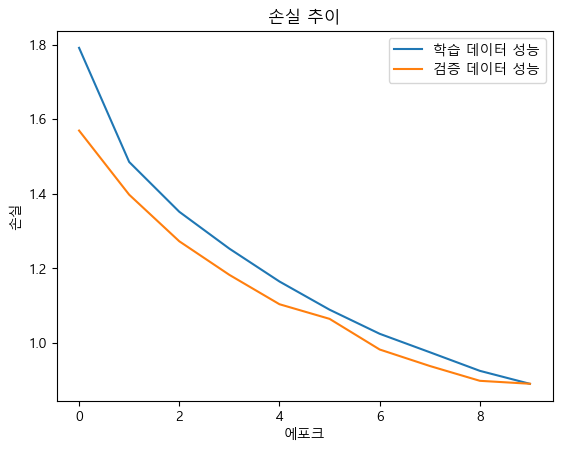

In [23]:
import matplotlib
import matplotlib.font_manager as fm
font_location="c:/windows/fonts/malgun.ttf"
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc("font",family=font_name)
plot_loss(history,"손실 추이")
plt.show()

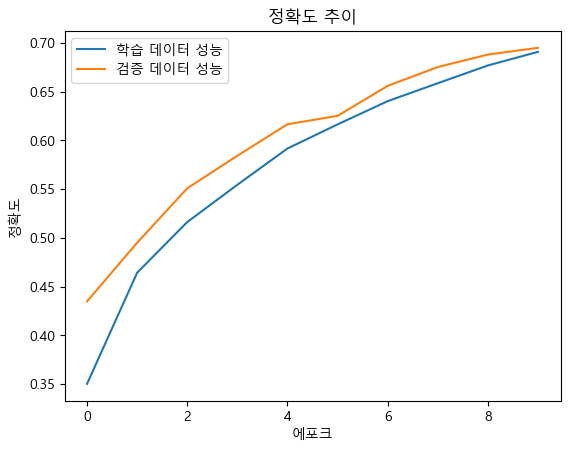

In [24]:
plot_acc(history, '정확도 추이')
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test,verbose=1)
y_pred=np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_test,axis=1),y_pred)

313/313 [==============================] - 3s 9ms/step


array([[795,  21,  30,   8,  10,   6,   5,   8,  66,  51],
       [ 28, 802,   0,   4,   1,   3,   4,   2,  22, 134],
       [ 93,   9, 541,  37,  94,  85,  52,  44,  19,  26],
       [ 46,  15,  82, 418,  76, 202,  39,  55,  24,  43],
       [ 35,   4,  77,  37, 640,  36,  31, 112,  16,  12],
       [ 27,   5,  55, 111,  43, 644,  13,  73,   8,  21],
       [ 12,  11,  59,  56,  63,  51, 693,  13,   8,  34],
       [ 24,   6,  29,  19,  49,  58,   2, 774,   1,  38],
       [ 82,  38,  14,   6,   4,   7,   2,   3, 803,  41],
       [ 44,  64,   4,   7,   3,   4,   4,   8,  30, 832]], dtype=int64)

In [26]:
model.save('c:/data/cifar/cifar.h5')